In [23]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import random
import datetime as dt

# functions
def im2dec(arr):
    """takes in an n-by-8 array of 16-bit compressed representation of 2ds pixels and returns an n-by-128 array 
    of the expanded visual field
    """
    def dec2binarr(arr):
        return np.array(list(''.join([bin(int(i))[2:].zfill(16) for i in arr]))).astype(int)
    
    assert arr.shape[1] == 8
    return np.array([dec2binarr(i) for i in arr])


11215
28310
2216


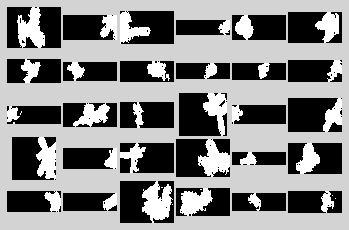

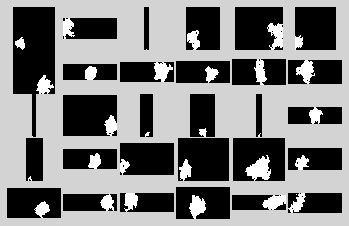

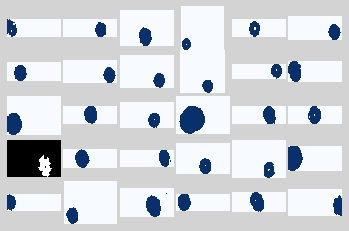

In [154]:


def plot_random_from_flight(flight_name, start_time, end_time, ax=[], size_lim=size_lim, apply_UW_filter=apply_UW_filter, color_by_class=True):
    if len(ax)==0:
        fig, axg = plt.subplots(nrows=5, ncols=6)
        ax = axg.flatten()
        plt.subplots_adjust(wspace=0.05, hspace=0.01)
        fig.patch.set_facecolor('lightgrey')
    flight_file = f'/home/disk/eos9/jfinlon/socrates/{flight_name.lower()}/pbp.{flight_name.lower()}.2DS.H.nc'
    probe_file = f'/home/disk/eos9/jfinlon/socrates/{flight_name.lower()}/DIMG.{flight_name.lower()}.2DS.H.cdf'
    class_file = f'/home/disk/eos9/jkcm/Data/particle/classified/UW_particle_classifications.{flight_name.lower()}.nc'
    probe_data = xr.open_dataset(probe_file)
    flight_data = xr.open_dataset(flight_file)
    class_data = xr.open_dataset(class_file)
    assert(len(class_data.time) == len(flight_data.time))
    data = xr.merge([flight_data, class_data])
    data = data.set_coords(['datetime'])
    data_subs = data.isel(time=np.logical_and(data.datetime>np.datetime64(start_time), data.datetime<np.datetime64(end_time)))
    if size_lim:
        data_subs = data_subs.where(data_subs.image_area>=size_lim, drop=True)
    if apply_UW_filter:
        data_subs = data_subs.where(data_subs.UW_flag==0, drop=True)
    
    for axi in ax:
        axi.axis('off')

    print(len(data_subs.time))
    random_selection = np.random.choice(data_subs.time, len(ax))
    for next_particle, axi in zip(random_selection, ax):
#         print(data_subs.UW_phase[next_particle].values)
        if color_by_class:
            color = 'Greys' if data_subs.UW_phase[next_particle].values == 0 else 'Blues_r'         
        else:
            color='Greys'
        particle_frame = int(data_subs.parent_rec_num[next_particle].values)
        time = data_subs.datetime[next_particle].values
        [slice_start, slice_end] = data_subs.position[next_particle].values.astype(int)
        image_data = probe_data['data'].isel(time=particle_frame-1, ImgBlocklen=slice(slice_start-1, slice_end)).values
        axi.imshow(~im2dec(image_data), cmap=color)
        
    return 

plot_random_from_flight( 'rf01', 
                        start_time=dt.datetime(2018, 1, 16, 4) + dt.timedelta(hours=0.42), 
                        end_time=dt.datetime(2018, 1, 16, 4) + dt.timedelta(hours=0.46),
                        size_lim=0.07, apply_UW_filter=True, color_by_class=True)

plot_random_from_flight( 'rf03', 
                        start_time=dt.datetime(2018, 1, 22, 22) + dt.timedelta(hours=0.3), 
                        end_time=dt.datetime(2018, 1, 22, 22) + dt.timedelta(hours=0.5),
                        size_lim=0.07, apply_UW_filter=True, color_by_class=True)

plot_random_from_flight('rf05', 
                        start_time=dt.datetime(2018, 1, 26, 4) + dt.timedelta(hours=0.85), 
                        end_time=dt.datetime(2018, 1, 26, 4) + dt.timedelta(hours=0.91), 
                        size_lim=0.07, apply_UW_filter=True, color_by_class=True)

3901


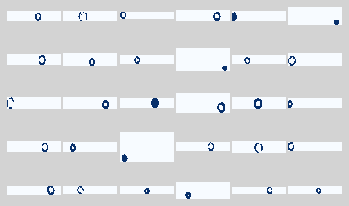

In [153]:

plot_random_from_flight('rf05', 
                        start_time=dt.datetime(2018, 1, 26, 4) + dt.timedelta(hours=0.85), 
                        end_time=dt.datetime(2018, 1, 26, 4) + dt.timedelta(hours=0.9), 
                        size_lim=0.01, apply_UW_filter=True, color_by_class=True)